**Acknowledgements**


*   https://www.udemy.com/course/pytorch-for-deep-learning-with-python-bootcamp/




In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [69]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
transform = transforms.ToTensor()

In [39]:
train_data = datasets.MNIST(root='/content',
train = True,
download=True,
transform=transform)

In [40]:
test_data = datasets.MNIST(root='/content',
train = False,
download=True,
transform=transform)

In [41]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: ToTensor()

In [42]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content
    Split: Test
    StandardTransform
Transform: ToTensor()

In [43]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [44]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [45]:
type(train_data[0])

tuple

In [46]:
image, label = train_data[0]

In [47]:
image.shape

torch.Size([1, 28, 28])

In [48]:
label

5

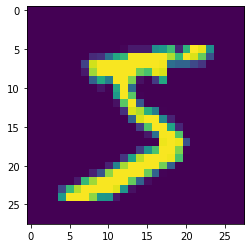

In [49]:
plt.imshow(image.reshape((28,28)))

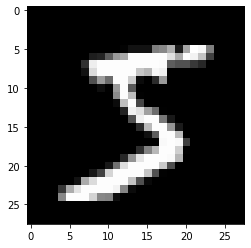

In [50]:
plt.imshow(image.reshape((28,28)),cmap='gray')

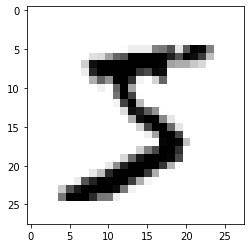

In [51]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')

In [52]:
torch.manual_seed(32)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=500,shuffle=False)

In [53]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}'))

In [54]:
for images, labels in train_loader:
  break

In [55]:
images.shape

torch.Size([100, 1, 28, 28])

In [56]:
labels.shape

torch.Size([100])

Labels: [   5    6    2    6    8    1    3    0    0    9    7    4]


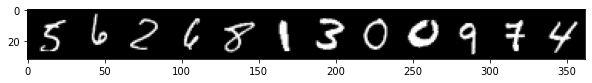

In [57]:
print('Labels:', labels[:12].numpy())
im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)));

In [58]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [59]:
torch.manual_seed(32)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [60]:
sum = 0
for param in model.parameters():
  print(param.numel())
  sum = sum + param.numel()

94080
120
10080
84
840
10


In [61]:
sum

105214

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [63]:
images.shape

torch.Size([100, 1, 28, 28])

In [64]:
images.view(100,-1).shape

torch.Size([100, 784])

In [65]:
import time
start_time = time.time()

epochs = 10
train_losses  = []
test_losses   = []
train_correct = []
test_correct  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.33606842  accuracy:  82.185%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.38513085  accuracy:  86.972%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.13335472  accuracy:  89.110%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.19329561  accuracy:  94.740%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.15964304  accuracy:  95.060%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.16193342  accuracy:  95.197%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.08569558  accuracy:  96.525%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.16931827  accuracy:  96.567%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.09621608  accuracy:  96.727%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.18913336  accuracy:  97.430%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.04947495  accuracy:  97.478%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.06178842  accuracy:  97.485%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.06211277  accuracy:  98.085%
epoch:  4  b

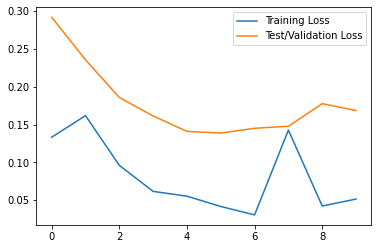

In [66]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Test/Validation Loss')
plt.legend()

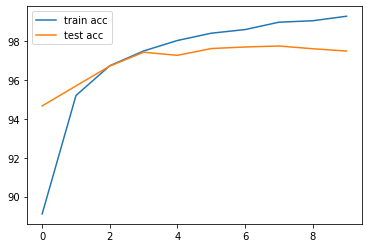

In [67]:
train_acc = [t/600 for t in train_correct]
test_acc  = [t/100 for t in test_correct]
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test acc')
plt.legend()

In [71]:
test_load_all = DataLoader(test_data, batch_size=10000,shuffle=False)

In [72]:
with torch.no_grad():
  
  correct = 0
  
  for X_test, y_test in test_load_all:
    y_val     = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct   += (predicted==y_test).sum()

In [73]:
100*correct.item()/len(test_data)

97.48

In [81]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

print(confusion_matrix(predicted.view(-1),y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 971    0    3    0    0    3    6    1    4    3]
 [   0 1123    1    0    0    0    3    6    2    2]
 [   0    2 1013    6    3    0    1   13    5    0]
 [   1    1    4  994    0   28    1    3    6    8]
 [   1    0    2    0  972    3    9    3    6   19]
 [   0    1    0    0    0  840    2    0    1    0]
 [   1    1    1    0    2    5  930    0    2    0]
 [   2    1    3    3    2    2    0  992    3    2]
 [   4    6    5    0    0    8    6    2  940    2]
 [   0    0    0    7    3    3    0    8    5  973]]
